In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [8]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
x = df.drop('Purchased',axis=1)
y = df['Purchased']

sc = StandardScaler()
xsc = sc.fit_transform(x)

xtrain,xtest,ytrain,ytest = train_test_split(xsc,y,test_size=0.3,random_state=101)

In [9]:
nbmodel = GaussianNB()
nbmodel.fit(xtrain,ytrain).score(xtest,ytest)

0.8837209302325582

In [11]:
# a classifier with quadratic decision boundary, generated by fitting conditional densisities
# to the data using Bayesian rule.

In [10]:
yhatnb = nbmodel.predict(xtest)
print(classification_report(ytest,yhatnb))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        47
           1       0.85      0.90      0.88        39

    accuracy                           0.88        86
   macro avg       0.88      0.88      0.88        86
weighted avg       0.89      0.88      0.88        86



(83, 91) (83, 91)


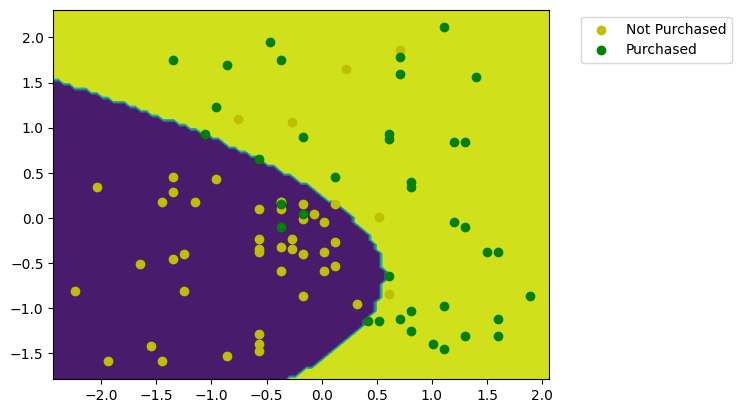

In [15]:
age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.05)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.05)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = nbmodel.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qdamodel = QuadraticDiscriminantAnalysis()
qdamodel.fit(xtrain,ytrain).score(xtest,ytest)

0.8953488372093024

In [19]:
yhatqda = qdamodel.predict(xtest)
print(classification_report(ytest,yhatqda))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        47
           1       0.86      0.92      0.89        39

    accuracy                           0.90        86
   macro avg       0.89      0.90      0.89        86
weighted avg       0.90      0.90      0.90        86



(83, 91) (83, 91)


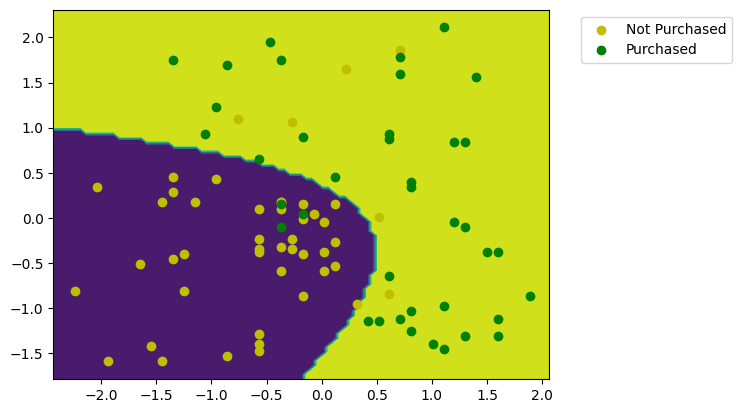

In [20]:
age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.05)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.05)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = qdamodel.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)